# **The Spotify Hit Predictor Dataset ( Jan 1st, 2010 until Dec 31st, 2019.)**

# **Data Description:**


**- track:** The Name of the track.

**- artist:** The Name of the Artist.

**- uri:** The resource identifier for the track.


**- danceability:** how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

**- energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

**- key:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

**- loudness:** The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db. 

**- mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**- speechiness:** Speechiness detects the presence of spoken words in a track. exclusively speech-like recordings (e.g. talk show, audio book) are closer to 1.0. 

**- acousticness:** confidence measure from 0 to 1 . 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

**- instrumentalness:** Predicts whether a track contains no vocals. Values from 0 to 1 where 1 represents no vocal content. 


**- liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**- valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**- tempo:** The overall estimated tempo of a track in beats per minute (BPM). 

**- duration_ms:**  The duration of the track in milliseconds.

**- time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**- chorus_hit:**This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. 

**- sections:** The number of sections the particular track has. 

**- target:** The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

    













In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#upload datasets and insert new row with the associated year 
df2010 = pd.read_csv('dataset-of-10s.csv')
df2010.insert(0,'decade',"2010's")

df2000 = pd.read_csv('dataset-of-00s.csv')
df2000.insert(0,'decade',"2000's")

df1990 = pd.read_csv('dataset-of-90s.csv')
df1990.insert(0,'decade',"1990's")

df1980 = pd.read_csv('dataset-of-80s.csv')
df1980.insert(0,'decade',"1980's")

df1970 = pd.read_csv('dataset-of-70s.csv')
df1970.insert(0,'decade',"1970's")

df1960 = pd.read_csv('dataset-of-60s.csv')
df1960.insert(0,'decade',"1960's")

allyearsdf = df2010.append([df2000,df1990,df1980,df1970,df1960])

allyearsdf = allyearsdf.set_index('decade')
allyearsdf = allyearsdf.sort_index(ascending=False)


#Dataframe with all the songs from 1960-2019
allyearsdf


#take a look at the headings
allyearsdf.head()


#To see which columns are in the DF 
allyearsdf.columns

#Creating a new column with the duration in seconds (dropping column with miliseconds)
allyearsdf['duration_ms'] = allyearsdf['duration_ms']/1000
allyearsdf.rename(columns={"duration_ms": "duration_s"})

#df2010['duration_ms'] = df2010['duration_ms']/1000
#df2010.rename(columns={"duration_ms": "duration_s"})


allyearsdf.sort_values('danceability',ascending=False).head(5)



,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
decade,,,,,,,,,,,,,,,,,,,
1980's,Funky Cold Medina,Tone-Loc,spotify:track:5YIF6HSOtHN9HdcE5IPzMe,0.988,0.633,5,-15.012,0,0.0888,0.0755,0.000002,0.0668,0.929,117.493,248.160,4,48.94409,13,1
2000's,Go Girl,Pitbull Featuring Trina & Young Bo$$,spotify:track:1MgM0WDaoQ2A3bnIQTR6ty,0.986,0.597,8,-6.809,1,0.3080,0.1450,0.000002,0.1970,0.761,115.004,229.669,4,25.22296,12,1
2010's,Cash Me Outside (#CashMeOutside),DJ Suede The Remix God,spotify:track:1r6cyaW7yMykwSyxTuwcuM,0.981,0.417,11,-10.732,0,0.1340,0.0471,0.359000,0.1030,0.262,122.044,129.384,4,30.05854,6,1
2010's,Ice Ice Baby,Glee Cast,spotify:track:3kUkjtNjWG7jFEMIEPnVJq,0.980,0.816,7,-8.087,1,0.0831,0.0192,0.002980,0.0554,0.787,120.019,205.120,4,37.90091,6,1
1980's,State of Shock,The Jacksons,spotify:track:1sLTxLJzyoBJiPzv420KAx,0.980,0.846,8,-7.696,0,0.1390,0.2830,0.149000,0.0520,0.891,121.562,271.000,4,23.74458,10,1


In [ ]:

#Slicing for all the hit songs 
allhitsdf = allyearsdf.loc[allyearsdf.target==1]
#slice by Target 1(hit)

allflopsdf = allyearsdf.loc[allyearsdf.target==0]
allflopsdf

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
decade,,,,,,,,,,,,,,,,,,,
2010's,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.2470,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.250,155.489,176.880,3,33.18083,9,0
2010's,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.6480,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.291,91.837,193.043,4,29.52521,7,0
2010's,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.533,0.9350,0,-3.704,1,0.1280,0.01390,0.000000,0.1680,0.481,140.092,262.493,4,21.04510,14,0
2010's,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.166,0.9850,7,-2.886,1,0.1700,0.00183,0.014200,0.9580,0.139,174.725,252.787,4,31.23583,11,0
2010's,Cirrus,Bonobo,spotify:track:2lJ4d8MCT6ZlDRHKJ1br14,0.640,0.8440,2,-8.412,0,0.0374,0.39500,0.933000,0.0827,0.364,119.042,352.247,4,80.60317,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960's,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.80800,0.879000,0.3630,0.183,119.821,26.244,4,0.00000,2,0
1960's,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.66300,0.000000,0.1070,0.834,135.104,142.987,4,28.34316,10,0
1960's,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.94000,0.000178,0.1150,0.139,92.472,137.200,4,56.63498,6,0


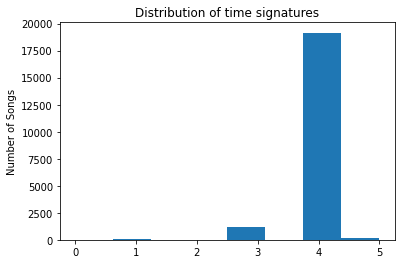

In [ ]:

#Max experiment 

# Histogram that displays the distribution of the time signature (# of beats)
plt.hist(allhitsdf.time_signature,bins=8)
plt.title('Distribution of time signatures')
plt.ylabel('Number of Songs')
plt.show()

#Result shows that 4/4 is the most common by far 





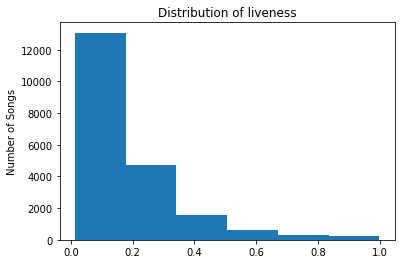

In [ ]:
# Histogram that displays the liveliness 

plt.hist(allhitsdf.liveness,bins=6)
plt.title('Distribution of liveness')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
#Analysis of Song duration 
hit2010 =df2010[df2010.target==1]

mean_duration_hitsong = (hit2010.duration_ms.median())
mean_duration_hitsong 

chorus_hit_mean = hit2010.chorus_hit.median()
chorus_hit_mean 
#35 seconds


mean_duration_hitsong
# 226 seconds = 3 min 46 seconds 

std_duration_hitsong = (hit2010.duration_ms.std())
std_duration_hitsong
# 43 seconds
allyearsdf.groupby(allyearsdf.index).agg({'duration_ms':['median','mean','std'],'tempo': ['median','mean','std'],'energy': ['median','mean','std'],'valence': ['median','mean','std'], 'acousticness': ['median','mean','std'],'speechiness':['median','mean','std'],'instrumentalness':['median','mean','std']})
                                            





#Range /Magnitude / Min/ Max 

duration_ms                          ... instrumentalness                    
            median        mean         std  ...           median      mean       std
decade                                      ...                                     
1960's    162.7465  183.638344  100.574385  ...         0.000041  0.149919  0.302054
1970's    210.8135  239.933116  144.973629  ...         0.000599  0.162163  0.306039
1980's    241.8600  254.756410  107.321348  ...         0.000321  0.139863  0.288144
1990's    246.7200  256.210994  103.439756  ...         0.000228  0.159886  0.304407
2000's    238.0065  258.170628  139.534121  ...         0.000022  0.150917  0.301452
2010's    221.2465  236.704210   85.636984  ...         0.000017  0.165293  0.318736

[6 rows x 21 columns]

In [ ]:
#Analysing the Median, Mean and Standard Deviatio of relevant variables of all the hit songs with a target of 1

allhitsdf.groupby(allhitsdf.index).agg({'duration_ms':['median','mean','std'],'tempo': ['median','mean','std'],'energy': ['median','mean','std'],'valence': ['median','mean','std'], 'acousticness': ['median','mean','std'],'speechiness':['median','mean','std'],'instrumentalness':['median','mean','std'],'danceability':['median','mean','std']})


duration_ms                         ... danceability                    
            median        mean        std  ...       median      mean       std
decade                                     ...                                 
1960's    159.0400  165.681837  43.013233  ...       0.5370  0.530582  0.146969
1970's    214.1460  233.918058  83.814720  ...       0.5820  0.570370  0.149094
1980's    248.1330  257.119786  56.402324  ...       0.6325  0.624444  0.138208
1990's    258.5865  263.748271  51.189772  ...       0.6570  0.648769  0.141827
2000's    235.0065  238.862944  43.409289  ...       0.6320  0.630049  0.148761
2010's    216.5730  220.502664  43.628032  ...       0.6450  0.641633  0.142438

[6 rows x 24 columns]

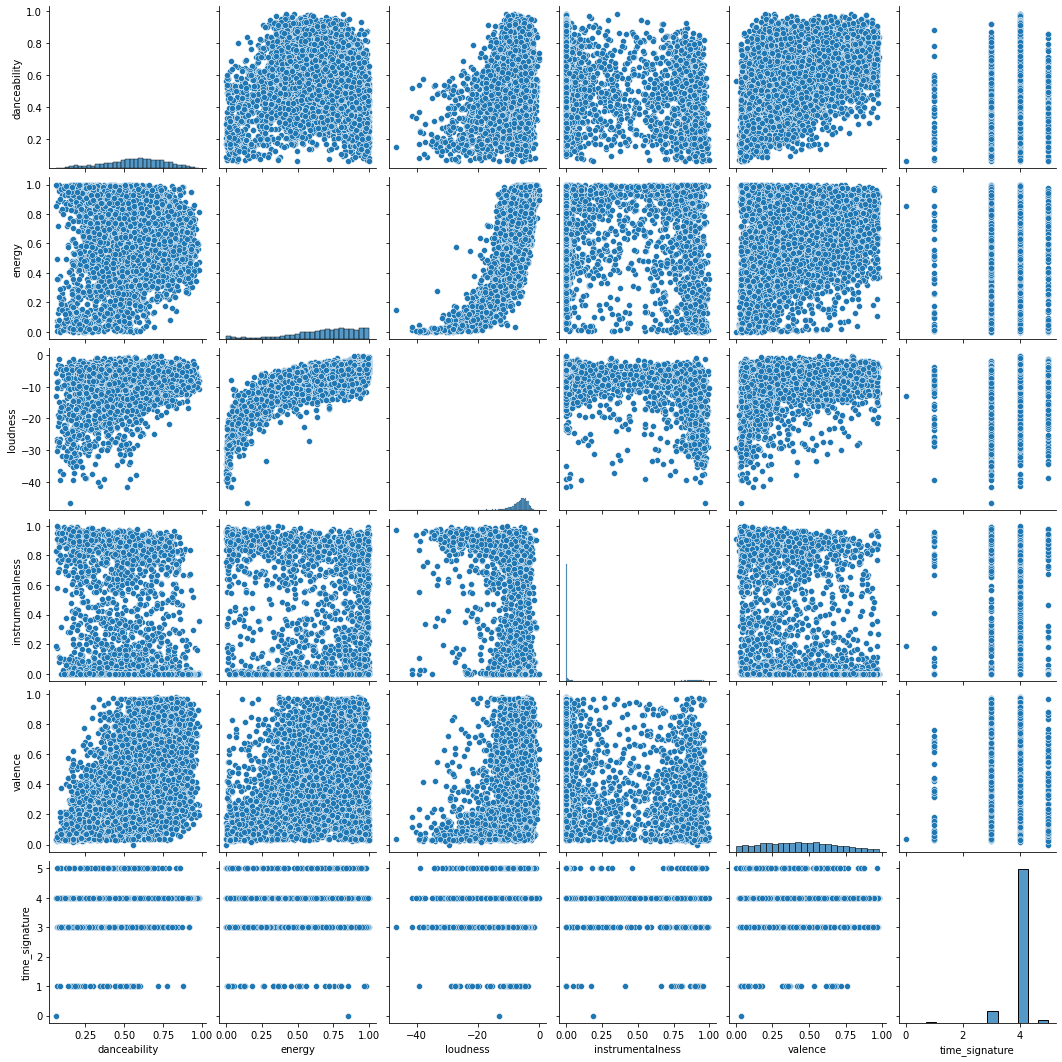

In [ ]:
#Seaborn 
#creating a scatterplot matrix to see relationshiop between variables/parameters (2010-2019)

columns_for_analysis = ['danceability', 'energy', 'loudness','instrumentalness',
'valence', 'time_signature', ]
  
# I leave out track, artist, uri,target,key,mode, duration_ms , speechiness , accoustiness,
#chorus_hit,sections, liveness,tempo
spotify_data_for_plot = df2010[columns_for_analysis]


#creating a scatterplot matrix to see relationshiop between variables/parameters (2010-2019)
data_plot = sns.pairplot(data=spotify_data_for_plot,kind='scatter',diag_kind='hist')
#looks ugly as hell





In [ ]:
#drop 3rd column because we don't need it
allyearsdf = allyearsdf.drop(columns='uri')

In [ ]:
#check for any null values
allyearsdf.isnull().sum()

track               0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [ ]:
#check for duplicates
duplicates = allyearsdf.loc[allyearsdf.duplicated()]
duplicates

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
decade,,,,,,,,,,,,,,,,,,
2010's,Let Us Fly,Love Sees No Color,0.487,0.915,7,-5.413,1,0.0331,0.000278,0.000014,0.3720,0.5480,93.966,206.005,4,21.52767,10,0
2010's,Chebika - Claudio Mate Metal Remix,Stefano Patarnello,0.624,0.863,7,-8.142,0,0.0300,0.000004,0.945000,0.0849,0.0394,119.993,386.000,4,58.49512,12,0
2010's,Metal Gods - Live from Battle Cry,Judas Priest,0.378,0.891,10,-4.735,1,0.0428,0.000010,0.013600,0.7770,0.1400,96.105,253.867,4,48.45906,11,0
2010's,Cheap Thrills,Freedom Dub,0.754,0.615,6,-8.746,0,0.0461,0.030400,0.005780,0.1790,0.6200,90.005,216.422,4,23.68503,9,0
2010's,"Le Bien, Le Mal",Guru,0.842,0.821,1,-9.860,1,0.1630,0.041300,0.002490,0.3460,0.5940,101.986,202.160,4,20.45929,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960's,Cherry Hill Park,Billy Joe Royal,0.614,0.501,5,-9.511,1,0.0422,0.609000,0.000000,0.1230,0.8960,125.727,180.320,4,24.14643,10,1
1960's,Theme from The Magnificent Seven,Elmer Bernstein,0.276,0.438,10,-11.859,1,0.0382,0.848000,0.861000,0.0572,0.6920,174.267,276.507,4,48.08021,12,0
1960's,Jam Up Jelly Tight,Tommy Roe,0.739,0.685,9,-8.808,1,0.0382,0.139000,0.000046,0.0566,0.7550,121.062,142.733,4,36.47661,7,1


In [ ]:

#Prod Variables-Danceability, loudness, energy, speechiness
#Composition-tempo, chorus-hit, duration-ms 
import matplotlib.pyplot as plt

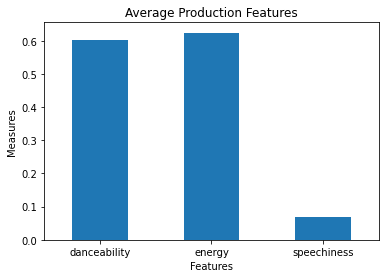

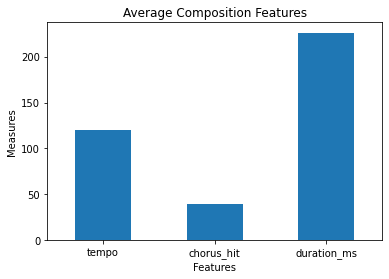

In [ ]:


prodvariables=allhitsdf.loc[:,['danceability', 'energy', 'speechiness']].mean()
prodvariables
compvariables= allhitsdf.loc[:,['tempo', 'chorus_hit', 'duration_ms']].mean()
prodvariables.plot.bar()
plt.title('Average Production Features')
plt.xticks(rotation=0) 
plt.xlabel('Features')
plt.ylabel('Measures')
plt.show()



compvariables.plot.bar()
plt.title('Average Composition Features')
plt.xticks(rotation=0)
plt.xlabel('Features')
plt.ylabel('Measures')
plt.show()

In [ ]:
#Future plans: make visuals for average of top variables including: danceability, energy, loudness, tempo,
#analyze variables for top 5 or ten songs
#make for loop for music producers to input data and would determine if it's a flop or not 

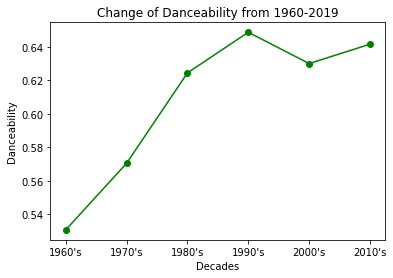

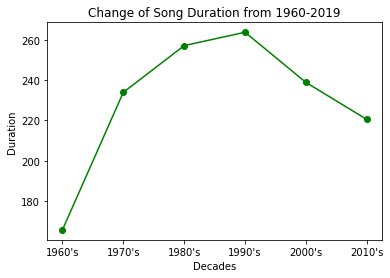

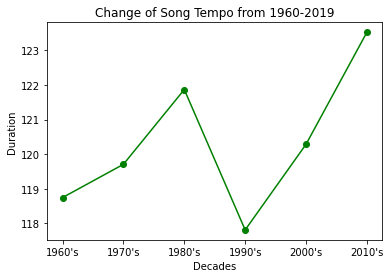

In [ ]:
#Change of Danceability from 1960-2019
fig,ax = plt.subplots()
plt.plot(allhitsdf.groupby('decade').danceability.agg('mean'),color='green',marker='o')

plt.xlabel('Decades')
plt.ylabel('Danceability')
plt.title('Change of Danceability from 1960-2019')

plt.show()






#Change of Song Duration from 1960-2019
fig,ax = plt.subplots()
plt.plot(allhitsdf.groupby('decade').duration_ms.agg('mean'),color='green',marker='o')

plt.xlabel('Decades')
plt.ylabel('Duration')
plt.title('Change of Song Duration from 1960-2019')

plt.show()

#Change of Song Tempo from 1960-2019

fig,ax = plt.subplots()
plt.plot(allhitsdf.groupby('decade').tempo.agg('mean'),color='green',marker='o')

plt.xlabel('Decades')
plt.ylabel('Duration')
plt.title('Change of Song Tempo from 1960-2019')

plt.show()














In [ ]:
from sklearn.linear_model import LinearRegression

# regression model to predict the success of a song in the 2010's
X = df2010[['tempo', 'duration_ms', 'energy','valence']]
y = df2010['target']


regr = LinearRegression()
regr.fit(X, y)


predictedtarget_2010s = regr.predict([[150, 220,0.70, 0.80]])

print(predictedtarget_2010s)

NameError: ignored